In [10]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt

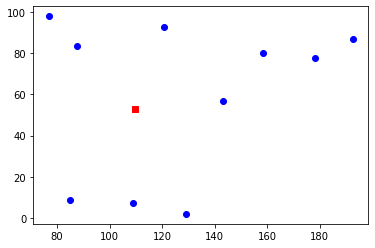

In [11]:
#Input Data
rnd = np.random
rnd.seed(0)
n = 10
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')

N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 20
q = {i: rnd.randint(1,10) for i in N}


In [3]:
from gurobipy import Model, GRB, quicksum

In [4]:
mdl = Model("CVRP")

Set parameter Username
Academic license - for non-commercial use only - expires 2022-03-22


In [5]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [6]:
mdl.modelSense = GRB.MINIMIZE

In [7]:
mdl.setObjective(quicksum(x[a]*c[a] for a in A))


In [8]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)== 1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if j!=i)== 1 for j in N);
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[i] == u[j])
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i] >= q[i] for  i in N);
mdl.addConstrs(u[i] <= Q for i in N);

In [9]:
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0xfc2180e6
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 178 rows and 12 columns
Presolve time: 0.06s
Presolved: 218 rows, 132 columns, 1301 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)
Found heuristic solution: objective 885.6836867

Root relaxation: objective 3.068464e+02, 44 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0